In [46]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import joblib as jb


In [32]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [33]:
df = df.drop("RowNumber" , axis=1)
df = df.drop("CustomerId" , axis=1)
df = df.drop("Surname" , axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [34]:

df = pd.get_dummies(df, columns=["Geography"], drop_first=True)
df = pd.get_dummies(df,columns=["Gender"], drop_first=True)

In [35]:
X = df.drop("Exited" ,axis=1)
Y = df["Exited"]


In [36]:
X['Age'] = X['Age'].fillna(X['Age'].median())


In [37]:
X.isna().sum()

CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            1
IsActiveMember       1
EstimatedSalary      0
Geography_Germany    0
Geography_Spain      0
Gender_Male          0
dtype: int64

In [38]:
X["HasCrCard"] = X["HasCrCard"].fillna(X["HasCrCard"].median())
X["IsActiveMember"] = X["IsActiveMember"].fillna(0)

In [39]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [40]:
X = (X - X.mean()) / X.std()

In [41]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)


model = LogisticRegression(class_weight="balanced")
model.fit(X_train,Y_train)

LogisticRegression(class_weight='balanced')

In [42]:
yp = model.predict(X_test)
print(yp)


[0 0 1 ... 0 0 1]


In [43]:
print(Y.value_counts())


Exited
0    7964
1    2038
Name: count, dtype: int64


In [44]:

print(classification_report(Y_test, yp))


              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1599
           1       0.39      0.70      0.50       402

    accuracy                           0.72      2001
   macro avg       0.65      0.71      0.65      2001
weighted avg       0.80      0.72      0.74      2001



Confusion Matrix:
 [[1157  442]
 [ 121  281]]


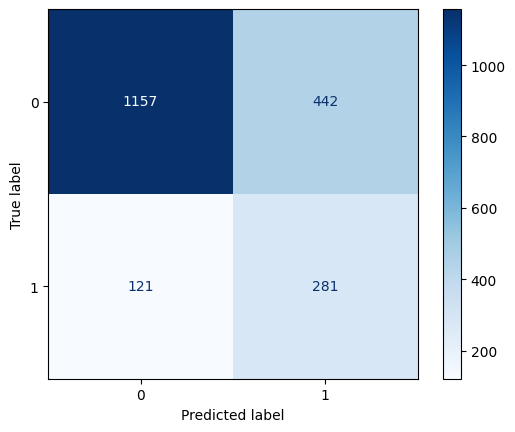

In [45]:

y_pred = model.predict(X_test)

cm = confusion_matrix(Y_test, y_pred)

print("Confusion Matrix:\n", cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()


In [48]:
jb.dump(model,"Model.joblib")

['Model.joblib']